In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample Data.json to Sample Data.json


In [ ]:
import pandas as pd

df = pd.read_json("Sample Data.json", lines=True)

In [ ]:
df.head()

,user_id,event_id,timestamp,class,requester_country,requester_ip,agent,city,name,email,...,clipboard_source_url,clipboard_source_hostname,clipboard_source_url_top_domain,clipboard_source_url_free_hosting,clipboard_source_url_contains_unicode,clipboard_source_url_known_malicious,clipboard_source_url_domain_age,clipboard_source_url_typosquatting,known_brand_similarity_id,known_brand_similarity_percentage
0,6cc4d60dac694d41859d547fe5d7a55b,1956f7c6-82d9-46ba-bcff-b05e4f59fcb0,2025-06-24 16:43:54.398000+00:00,identity,US,52.173.180.70,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Des Moines,Aditya Kapoor,aditya@codeaurorix.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6cc4d60dac694d41859d547fe5d7a55b,f01e425f-a24d-49f6-a88b-defc0043949e,2025-06-24 16:49:04.587000+00:00,identity,US,52.173.180.70,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Des Moines,Aditya Kapoor,aditya@codeaurorix.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6cc4d60dac694d41859d547fe5d7a55b,739843c9-4414-483c-98c6-fe86aff37e14,2025-06-24 16:46:58.107000+00:00,identity,US,52.173.180.70,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Des Moines,Aditya Kapoor,aditya@codeaurorix.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6cc4d60dac694d41859d547fe5d7a55b,e0dc1a07-d2bf-49d5-93a7-08ca24f99217,2025-06-24 16:35:13.622000+00:00,identity,US,20.246.78.255,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Boydton,Aditya Kapoor,aditya@codeaurorix.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6cc4d60dac694d41859d547fe5d7a55b,30c6ea45-a069-4605-af6e-f7b63467c7eb,2025-06-24 16:45:56.317000+00:00,identity,US,52.173.180.70,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Des Moines,Aditya Kapoor,aditya@codeaurorix.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   user_id                                10880 non-null  object             
 1   event_id                               10880 non-null  object             
 2   timestamp                              10880 non-null  datetime64[ns, UTC]
 3   class                                  10880 non-null  object             
 4   requester_country                      10880 non-null  object             
 5   requester_ip                           10880 non-null  object             
 6   agent                                  10880 non-null  object             
 7   city                                   10880 non-null  object             
 8   name                                   10880 non-null  object             
 9   email 

In [ ]:
import sqlite3
import re

con = sqlite3.connect(":memory:")

def regexp(expr, item):
    if item is None:
        return False
    return re.search(expr, str(item), re.IGNORECASE) is not None

con.create_function("REGEXP", 2, regexp)

for col in df.columns:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)

df.to_sql('events', con, index=False, if_exists='replace')


10880

In [12]:
query = r"""
SELECT
  domain,
  clipboard_text,
  CASE

    -- URL
    WHEN clipboard_text REGEXP '(https?://[^\s]+)' THEN 'URL'

    -- Email
    WHEN clipboard_text REGEXP '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' THEN 'EMAIL'

    -- Credit Card
    WHEN clipboard_text REGEXP '\b(?:\d{4}[-\s]?){3}\d{4}\b' THEN 'CREDIT_CARD'

    -- Aadhaar
    WHEN clipboard_text REGEXP '\b\d{4}[-\s]?\d{4}[-\s]?\d{4}\b' THEN 'AADHAAR'

    -- Phone
    WHEN clipboard_text REGEXP '^\+?[1-9][0-9]{6,14}$' THEN 'PHONE'
    WHEN clipboard_text REGEXP '(\+91[\-\s]?)?0?\d{10}' THEN 'PHONE'

    -- SSN
    WHEN clipboard_text REGEXP '\b\d{3}-\d{2}-\d{4}\b' THEN 'SSN'

    -- API key
    WHEN clipboard_text REGEXP '(AKIA[0-9A-Z]{16})' THEN 'API_KEY'
    WHEN clipboard_text REGEXP '(AIza[0-9A-Za-z-_]{35})' THEN 'API_KEY'

    -- Source Code
    WHEN clipboard_text REGEXP '(function|def |import |class )' THEN 'SOURCE_CODE'
    WHEN clipboard_text REGEXP '(console\.log|System\.out\.print|printf\()' THEN 'SOURCE_CODE'

    -- Masked Data
    WHEN clipboard_text REGEXP '<masked>' THEN 'MASKED_DATA'
    WHEN clipboard_text REGEXP '^[\*]+$' THEN 'MASKED_DATA'

    -- PAN
    WHEN clipboard_text REGEXP '^[A-Z]{5}[0-9]{4}[A-Z]$' THEN 'PAN'

    -- Data
    WHEN clipboard_text REGEXP '[0-9]{4}[-/][0-9]{2}[-/][0-9]{2}' THEN 'DATE'
    WHEN clipboard_text REGEXP '[0-9]{2}[-/][0-9]{2}[-/][0-9]{4}' THEN 'DATE'
    WHEN clipboard_text REGEXP '[0-9]{2}\.[0-9]{2}\.[0-9]{4}' THEN 'DATE'
    WHEN clipboard_text REGEXP '^[0-9]{8}$' THEN 'DATE'

  END AS detected_sensitivity
FROM events
WHERE domain IN ('chatgpt.com', 'claude.ai', 'deepseek.com', 'perplexity.ai', 'openai.com',
'sider.ai', 'glasp.co', 'otter.ai', 'grammarly.com', 'bard.google.com')
AND clipboard_text IS NOT NULL AND clipboard_text <> '';
"""

classified = pd.read_sql_query(query, con)

result = pd.read_sql_query(query, con)
print(result)

            domain                                     clipboard_text  \
0      chatgpt.com                                    gvhbjnkm1234456   
1    perplexity.ai  <masked>\r\n4Sp5kGBLtv5rYk9XkD4g6Xe6sP6Jh3K7Gh...   
2        claude.ai  <masked>\r\n4Sp5kGBLtv5rYk9XkD4g6Xe6sP6Jh3K7Gh...   
3        claude.ai  <masked>\r\n4Sp5kGBLtv5rYk9XkD4g6Xe6sP6Jh3K7Gh...   
4      chatgpt.com  After masking, the data is not being hidden pr...   
..             ...                                                ...   
579    chatgpt.com  https://app.asana.com/app/asana/-/get_asset?as...   
580    chatgpt.com  https://app.asana.com/app/asana/-/get_asset?as...   
581    chatgpt.com  https://app.asana.com/app/asana/-/get_asset?as...   
582    chatgpt.com  https://app.asana.com/app/asana/-/get_asset?as...   
583    chatgpt.com  https://app.asana.com/app/asana/-/get_asset?as...   

    detected_sensitivity  
0                   None  
1            MASKED_DATA  
2            MASKED_DATA  
3            MA

In [ ]:
result.to_csv('classified_clipboard_data.csv', index=False)

from google.colab import files
files.download('classified_clipboard_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
counts=result["detected_sensitivity"].value_counts()
counts

,count
detected_sensitivity,
MASKED_DATA,68
EMAIL,53
PHONE,42
SSN,36
CREDIT_CARD,30
AADHAAR,29
PAN,25
URL,16
SOURCE_CODE,11


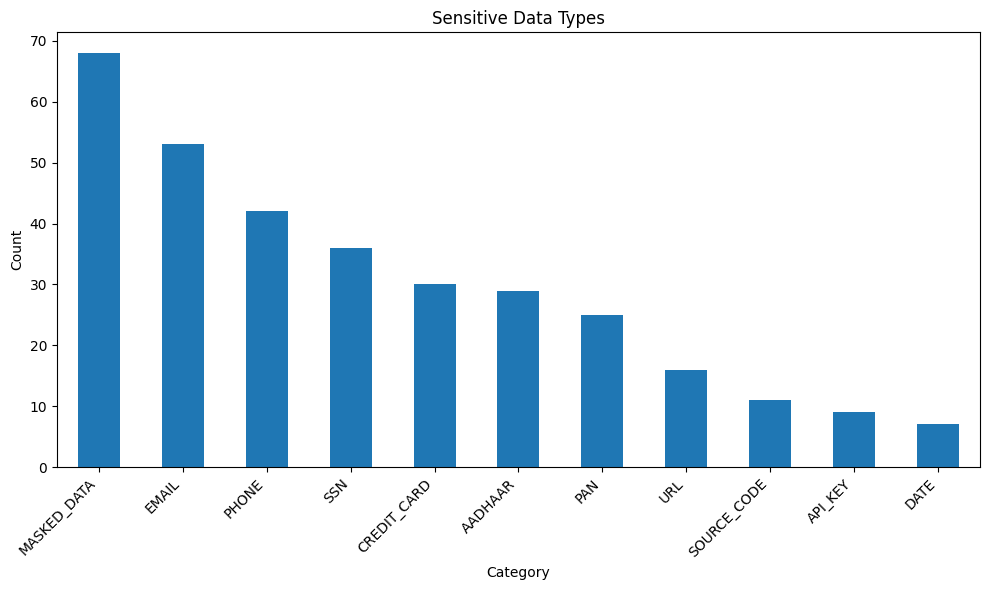

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
counts.plot(kind="bar")
plt.title("Sensitive Data Types")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

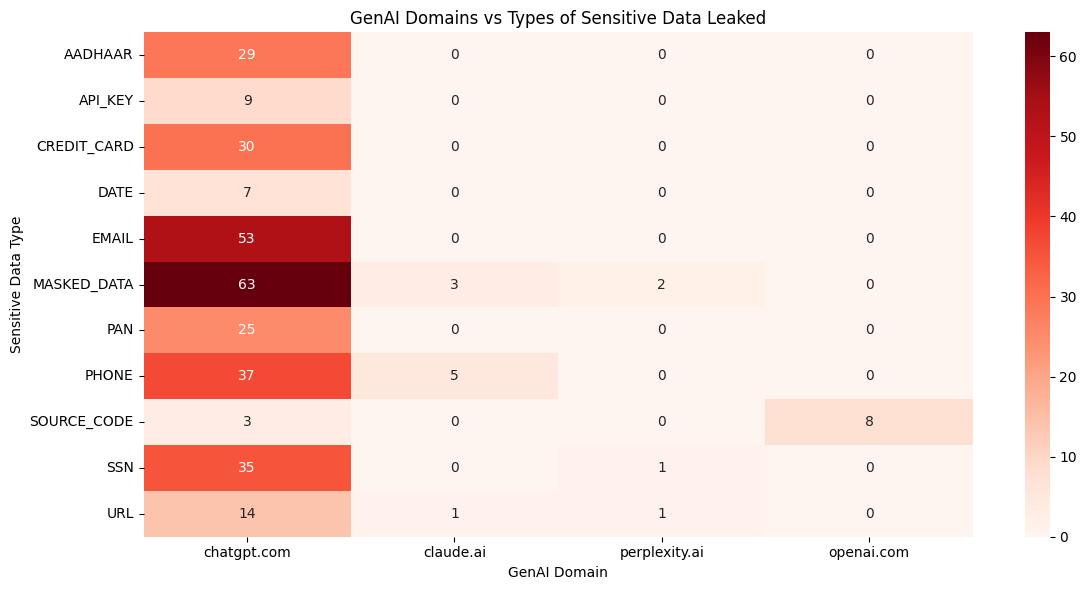

In [ ]:
import seaborn as sns
heatmap_df = result.groupby(['detected_sensitivity', 'domain']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, cmap='Reds')
plt.title("GenAI Domains vs Types of Sensitive Data Leaked")
plt.xlabel("GenAI Domain")
plt.ylabel("Sensitive Data Type")
plt.tight_layout()
plt.show()
